In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [29]:
df = pd.read_csv("data.csv")

# EDA

In [30]:
df.shape

(45716, 12)

In [31]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN,NaN


In [32]:
df.isnull().sum()

name               0
id                 0
nametype           0
recclass           0
mass (g)         131
fall               0
year             291
reclat          7315
reclong         7315
GeoLocation     7315
States         44057
Counties       44057
dtype: int64

In [33]:
df.describe()

,id,mass (g),year,reclat,reclong,States,Counties
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000,1659.000000,1659.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319,17.337553,1353.331525
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298,10.410888,994.089259
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330,1.000000,5.000000
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000,9.000000,482.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670,15.000000,1195.000000
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670,23.000000,2113.000000
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330,51.000000,3210.000000


# DATA Cleaning

In [34]:
df = df[(df.year >= 860) & (df.year <= 2016)]
df = df[((df.reclong <= 180) & (df.reclong >= -180)) & ((df.reclat != 0) | (df.reclong != 0))]

In [35]:
df.isnull().sum()

name               0
id                 0
nametype           0
recclass           0
mass (g)         107
fall               0
year               0
reclat             0
reclong            0
GeoLocation        0
States         30383
Counties       30383
dtype: int64

In [36]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Display data types
data_types = df.dtypes

In [37]:
# Summarize the findings
missing_values, duplicates, data_types

(name               0
 id                 0
 nametype           0
 recclass           0
 mass (g)         107
 fall               0
 year               0
 reclat             0
 reclong            0
 GeoLocation        0
 States         30383
 Counties       30383
 dtype: int64,
 0,
 name            object
 id               int64
 nametype        object
 recclass        object
 mass (g)       float64
 fall            object
 year           float64
 reclat         float64
 reclong        float64
 GeoLocation     object
 States         float64
 Counties       float64
 dtype: object)

In [40]:
# Drop states, country and GeoLocation
df = df.iloc[:,:-2]

In [41]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


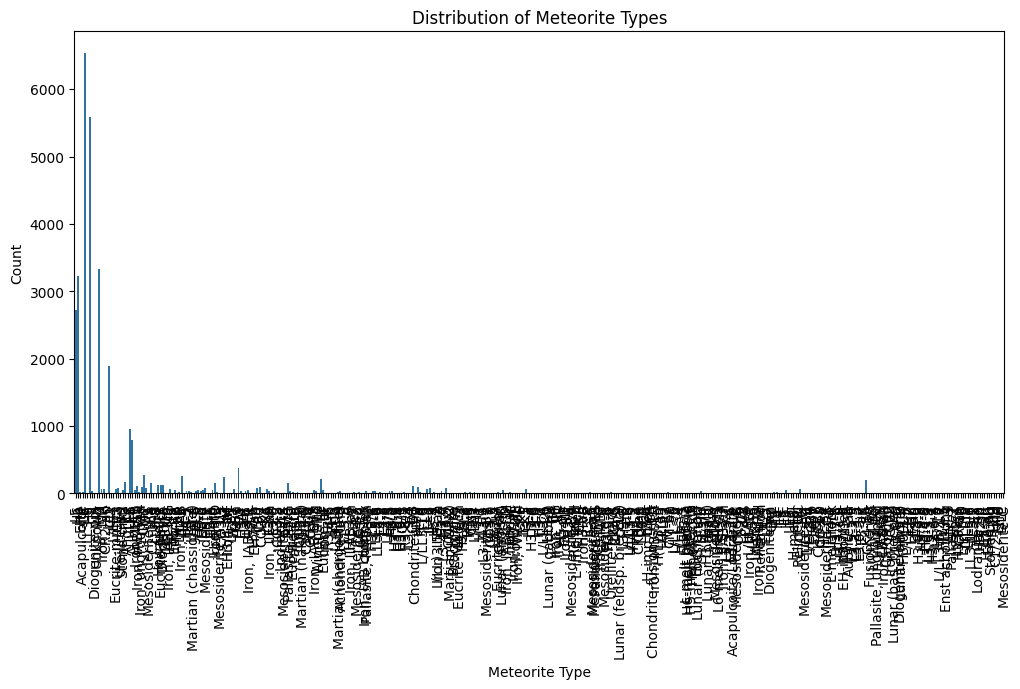

In [42]:
# Plot the distribution of meteorite types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='recclass')
plt.title('Distribution of Meteorite Types')
plt.xlabel('Meteorite Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

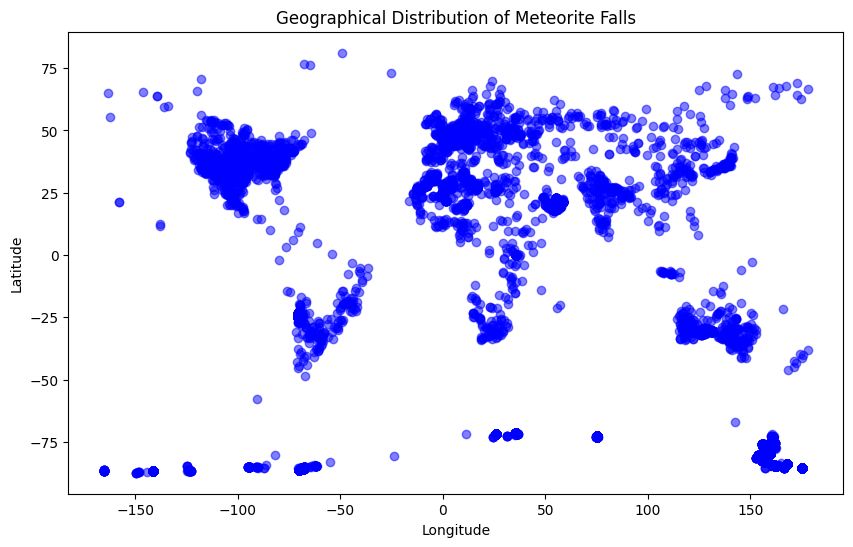

In [44]:

# Plot the geographical distribution of meteorite falls
plt.figure(figsize=(10, 6))
plt.scatter(df['reclong'], df['reclat'], alpha=0.5, c='blue')
plt.title('Geographical Distribution of Meteorite Falls')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

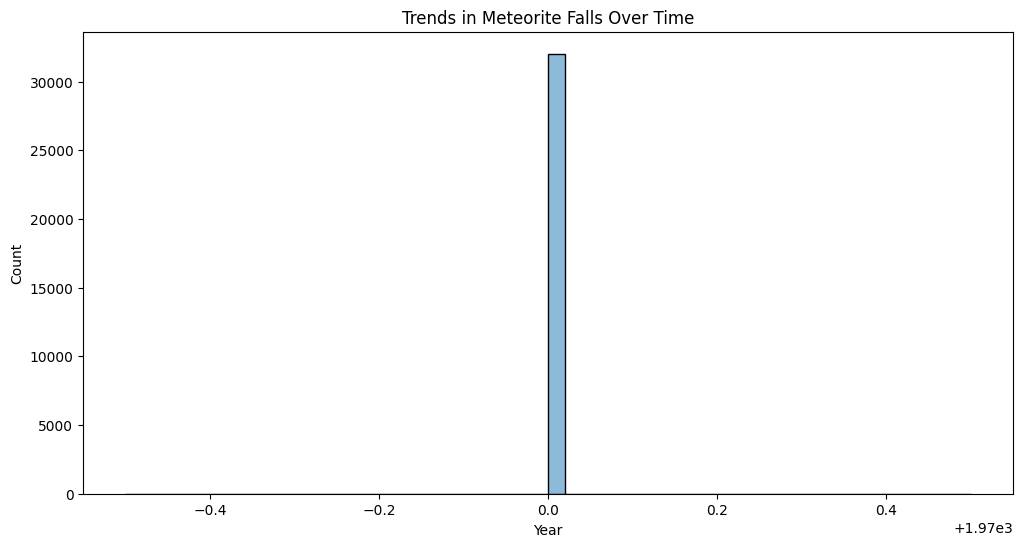

In [46]:
# Analyze trends over time
df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year
plt.figure(figsize=(12, 6))
sns.histplot(df['year'].dropna(), bins=50, kde=True)
plt.title('Trends in Meteorite Falls Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

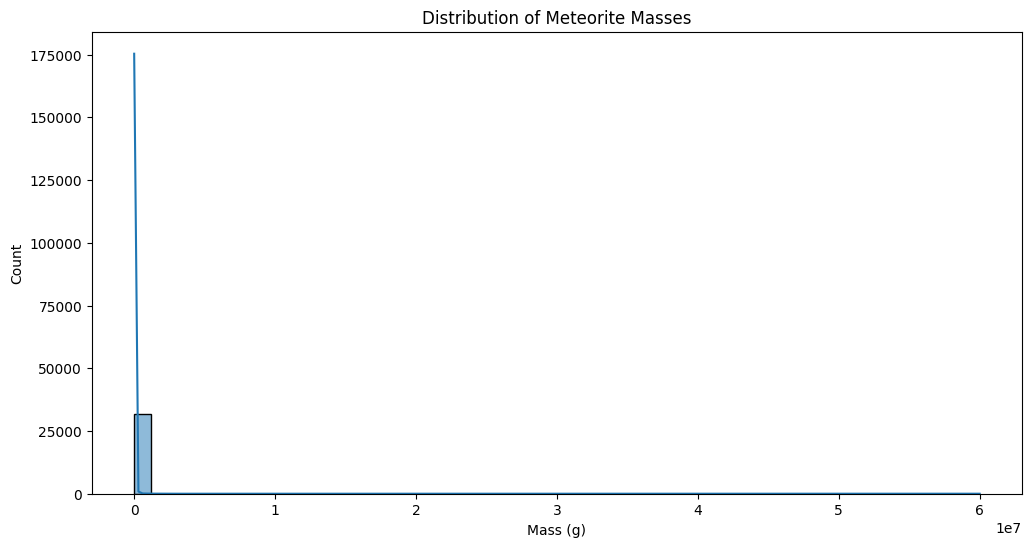

In [47]:
# Mass distribution analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['mass (g)'].dropna(), bins=50, kde=True)
plt.title('Distribution of Meteorite Masses')
plt.xlabel('Mass (g)')
plt.ylabel('Count')
plt.show()

# Visualization

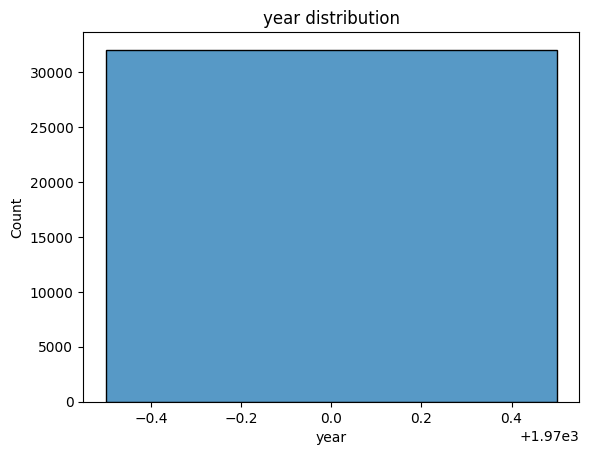

In [50]:
sns.histplot(df.year)
plt.title('year distribution');

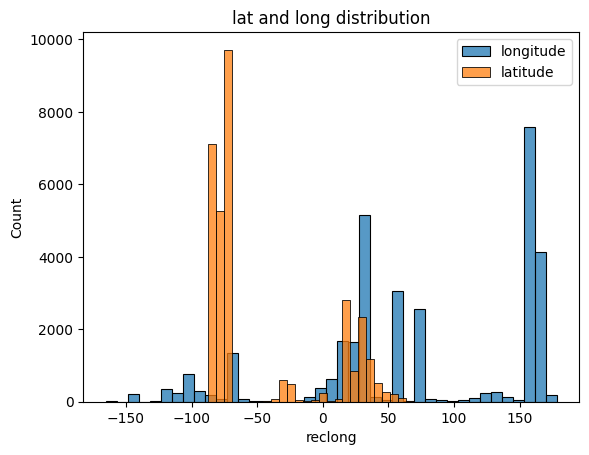

In [49]:
sns.histplot(df.reclong)
sns.histplot(df.reclat)
plt.title('lat and long distribution');
plt.legend(['longitude', 'latitude'])

In [51]:
df.describe()

,id,mass (g),year,reclat,reclong
count,32036.000000,3.192900e+04,32036.0,32036.000000,32036.000000
mean,20801.532807,1.854289e+04,1970.0,-46.991270,73.010185
std,14934.608512,6.868495e+05,0.0,46.923538,83.160261
min,1.000000,0.000000e+00,1970.0,-87.366670,-165.433330
25%,9257.750000,6.500000e+00,1970.0,-79.683330,26.000000
50%,18626.500000,2.960000e+01,1970.0,-72.000000,56.702060
75%,27265.250000,2.020000e+02,1970.0,18.395695,159.390585
max,57455.000000,6.000000e+07,1970.0,81.166670,178.200000


In [52]:
px.scatter_geo(data_frame = df,
                lat = 'reclat',
                  lon = 'reclong',
                    color = 'recclass',
                      title = 'metero location and their class')

looks like there's no any pattern for meteor class

In [53]:
df['fall'] = df.fall.apply(lambda x : 'observed' if x == 'Fell' else 'not-observed')
px.scatter_geo(data_frame = df,
                lat = 'reclat',
                  lon = 'reclong',
                    color = 'fall',
                      title = 'metero location and their class')

most of the meteors fell in india were mostle observed,
almost most of the meteros fell in australia were not observed